<a href="https://colab.research.google.com/github/JanLeyva/approach_TFM/blob/master/FairFace_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version

Python 3.7.12


# <font color='#A8EB15'> <b> Predict Age, Gender and Race
* [Repo](https://github.com/dchen236/FairFace)

## <font color='#A8EB15'> <b> Configuration FairFace

In [1]:
!pip install pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
    Running setup.py install for pytorch ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-q9l_seje/pytorch_1f525344c5124c58a259af2d7a2d4394/setup.py'"'"'; __file__='"'"'/tmp/pip-install-q9l_seje/pytorch_1f525344c5124c58a259af2d7a2d4394/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-flspj3wv/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/include/python3.7/pytorch Check the logs f

In [2]:
!pip install dlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!git clone https://github.com/JanLeyva/approach_TFM.git

Cloning into 'approach_TFM'...
remote: Enumerating objects: 833, done.
remote: Counting objects: 100% (241/241), done.
remote: Compressing objects: 100% (129/129), done.
remote: Total 833 (delta 118), reused 227 (delta 104), pack-reused 592
Receiving objects: 100% (833/833), 32.81 MiB | 18.45 MiB/s, done.
Resolving deltas: 100% (224/224), done.


In [4]:
import os 
home = "/content"

In [5]:
os.chdir(home)

In [6]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1kXdAsqT8YiNYIMm8p5vQUvNFwhBbT4vQ-jxEZdBQ5J4X' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1kXdAsqT8YiNYIMm8p5vQUvNFwhBbT4vQ" -O multi_4.pt && rm -rf /tmp/cookies.txt

--2022-05-28 11:02:19--  https://docs.google.com/uc?export=download&confirm=&id=1kXdAsqT8YiNYIMm8p5vQUvNFwhBbT4vQ
Resolving docs.google.com (docs.google.com)... 74.125.195.138, 74.125.195.139, 74.125.195.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-7c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4hafq9qqrdqa6mrps31dlk561asabija/1653735675000/15656402004234789839/*/1kXdAsqT8YiNYIMm8p5vQUvNFwhBbT4vQ?e=download [following]
--2022-05-28 11:02:22--  https://doc-0g-7c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4hafq9qqrdqa6mrps31dlk561asabija/1653735675000/15656402004234789839/*/1kXdAsqT8YiNYIMm8p5vQUvNFwhBbT4vQ?e=download
Resolving doc-0g-7c-docs.googleusercontent.com (doc-0g-7c-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc-0g-7c-docs.googleusercontent.com (doc-0g-7c-

In [7]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=113QMzQzkBDmYMs9LwzvD-jxEZdBQ5J4X' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=113QMzQzkBDmYMs9LwzvD-jxEZdBQ5J4X" -O multi_7.pt && rm -rf /tmp/cookies.txt

--2022-05-28 11:04:17--  https://docs.google.com/uc?export=download&confirm=&id=113QMzQzkBDmYMs9LwzvD-jxEZdBQ5J4X
Resolving docs.google.com (docs.google.com)... 173.194.203.139, 173.194.203.102, 173.194.203.100, ...
Connecting to docs.google.com (docs.google.com)|173.194.203.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-7c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/43u2qokeck9neaff2ruaabksqlqqc970/1653735825000/15656402004234789839/*/113QMzQzkBDmYMs9LwzvD-jxEZdBQ5J4X?e=download [following]
--2022-05-28 11:04:18--  https://doc-08-7c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/43u2qokeck9neaff2ruaabksqlqqc970/1653735825000/15656402004234789839/*/113QMzQzkBDmYMs9LwzvD-jxEZdBQ5J4X?e=download
Resolving doc-08-7c-docs.googleusercontent.com (doc-08-7c-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc-08-7c-docs.googleusercontent.com (doc-08

## <font color='#A8EB15'> <b> Photos Download, Process and create CSV

In [8]:
os.chdir(home)

In [22]:
os.chdir("/content/approach_TFM/feature_extraction/FairFace_features")

In [10]:
!rm -r detected_faces

In [11]:
%%time 
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1B5kwn6IW28M03tlOoUdJQ1jFRgSyK6Ya' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1B5kwn6IW28M03tlOoUdJQ1jFRgSyK6Ya" -O hateful_memes.zip && rm -rf /tmp/cookies.txt

--2022-05-28 11:06:02--  https://docs.google.com/uc?export=download&confirm=t&id=1B5kwn6IW28M03tlOoUdJQ1jFRgSyK6Ya
Resolving docs.google.com (docs.google.com)... 74.125.142.102, 74.125.142.101, 74.125.142.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.142.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-44-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k7khugll5964305bmrd9kbkje89hgs7b/1653735900000/01761641334275034120/*/1B5kwn6IW28M03tlOoUdJQ1jFRgSyK6Ya?e=download [following]
--2022-05-28 11:06:02--  https://doc-0c-44-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k7khugll5964305bmrd9kbkje89hgs7b/1653735900000/01761641334275034120/*/1B5kwn6IW28M03tlOoUdJQ1jFRgSyK6Ya?e=download
Resolving doc-0c-44-docs.googleusercontent.com (doc-0c-44-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc-0c-44-docs.googleusercontent.com (doc-0c-44

* Create *CSV*

In [43]:
!python3 createCSV.py --help

usage: createCSV.py [-h] [--path PATH] [--outpath OUTPATH]

scrip to create csv file to be used in FairFace

optional arguments:
  -h, --help         show this help message and exit
  --path PATH        path where images are stored.
  --outpath OUTPATH  output path for the .csv


In [48]:
!python3 createCSV.py \
  --path /content/approach_TFM/feature_extraction/FairFace_features/hateful_memes/img \
  --outpath /content/approach_TFM/feature_extraction/FairFace_features

In [45]:
import pandas as pd
pd.read_csv("/content/approach_TFM/feature_extraction/FairFace_features/csvImg.csv")

,img_path
0,/content/approach_TFM/feature_extraction/FairF...
1,/content/approach_TFM/feature_extraction/FairF...
2,/content/approach_TFM/feature_extraction/FairF...
3,/content/approach_TFM/feature_extraction/FairF...
4,/content/approach_TFM/feature_extraction/FairF...
...,...
12135,/content/approach_TFM/feature_extraction/FairF...
12136,/content/approach_TFM/feature_extraction/FairF...
12137,/content/approach_TFM/feature_extraction/FairF...
12138,/content/approach_TFM/feature_extraction/FairF...


## <font color='#A8EB15'> <b> Predict

In [46]:
os.chdir("/content/approach_TFM/feature_extraction/FairFace_features")

In [ ]:
!python3 predict_new.py --csv "csvImg.csv"

## <font color='#A8EB15'> <b> Visualize

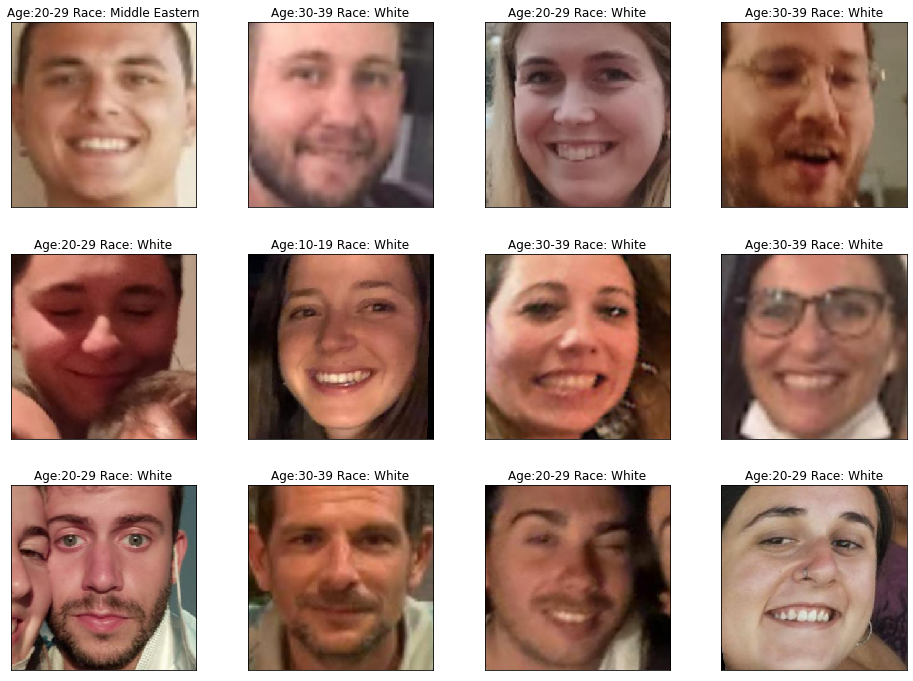

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25, 18))  
fig.subplots_adjust(left=0, right=0.5, bottom=0, top=0.5, hspace=0.25, wspace=0.25)

os.chdir("/content")
outputFairFace = pd.read_csv("FairFace/test_outputs.csv")
for i in range(12):
    ax = fig.add_subplot(3, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(plt.imread(os.path.join("/content/FairFace",outputFairFace.loc[i,'face_name_align'])),  interpolation='nearest')
    age=outputFairFace.loc[i, 'age']
    race=outputFairFace.loc[i, 'race']
    ax.set_title(f'Age:{ age} Race: { race}')

In [ ]:
range(12)

range(0, 12)

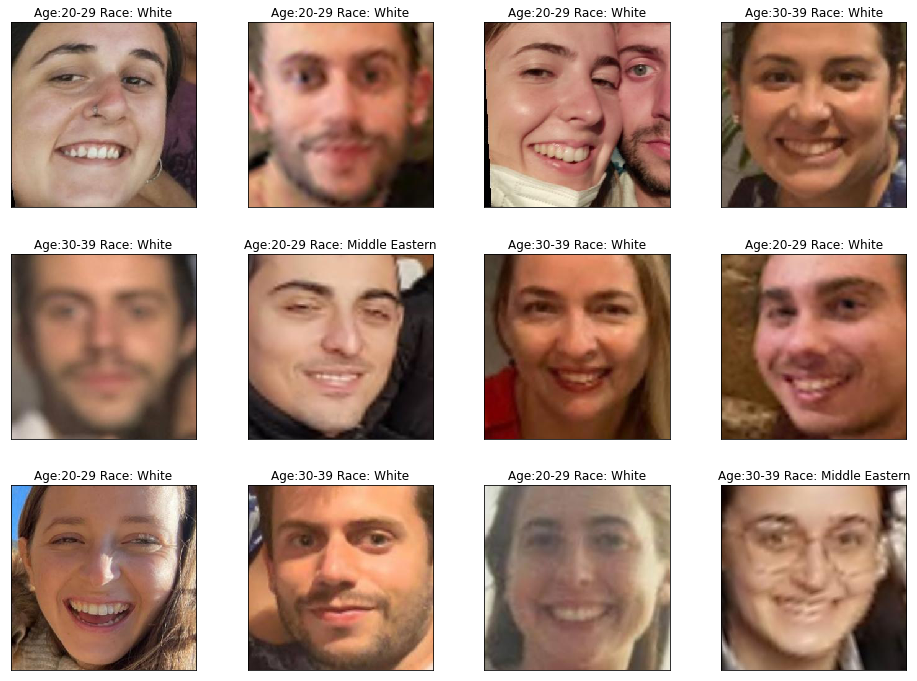

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25, 18))  
fig.subplots_adjust(left=0, right=0.5, bottom=0, top=0.5, hspace=0.25, wspace=0.25)


for i in range(11,23):
    ax = fig.add_subplot(3, 4, (i + -10), xticks=[], yticks=[])
    ax.imshow(plt.imread(os.path.join("/content/FairFace",outputFairFace.loc[i,'face_name_align'])),  interpolation='nearest')
    age=outputFairFace.loc[i, 'age']
    race=outputFairFace.loc[i, 'race']
    ax.set_title(f'Age:{ age} Race: { race}')

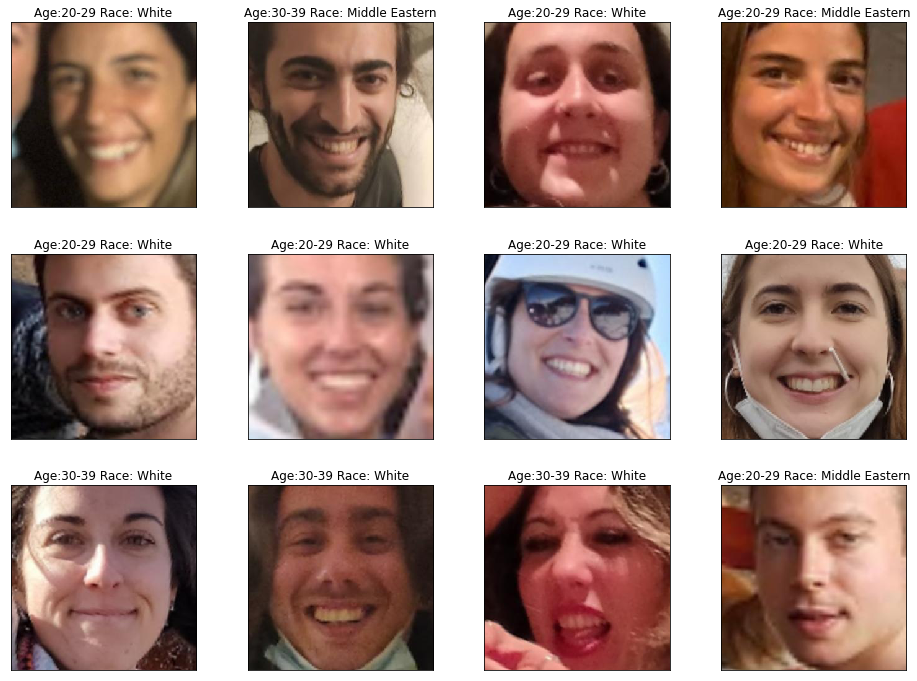

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25, 18))  
fig.subplots_adjust(left=0, right=0.5, bottom=0, top=0.5, hspace=0.25, wspace=0.25)


for i in range(23,35):
    ax = fig.add_subplot(3, 4, (i + -22), xticks=[], yticks=[])
    ax.imshow(plt.imread(os.path.join("/content/FairFace",outputFairFace.loc[i,'face_name_align'])),  interpolation='nearest')
    age=outputFairFace.loc[i, 'age']
    race=outputFairFace.loc[i, 'race']
    ax.set_title(f'Age:{ age} Race: { race}')

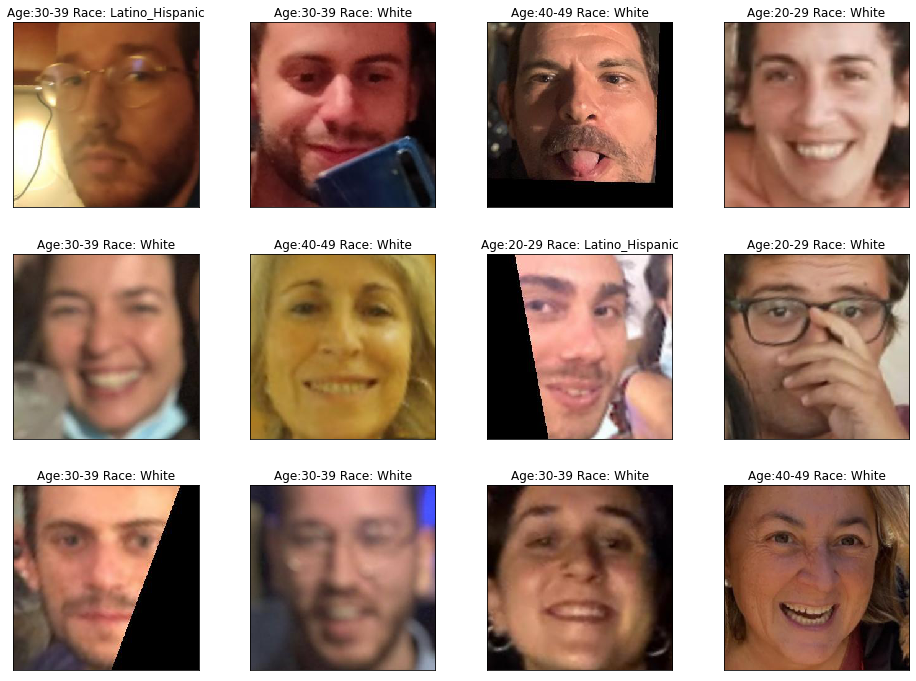

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25, 18))  
fig.subplots_adjust(left=0, right=0.5, bottom=0, top=0.5, hspace=0.25, wspace=0.25)


for i in range(36, 48):
    ax = fig.add_subplot(3, 4, (i + -35), xticks=[], yticks=[])
    ax.imshow(plt.imread(os.path.join("/content/FairFace",outputFairFace.loc[i,'face_name_align'])),  interpolation='nearest')
    age=outputFairFace.loc[i, 'age']
    race=outputFairFace.loc[i, 'race']
    ax.set_title(f'Age:{ age} Race: { race}')